# 1. Sizer 기본개념

SiZer (Significant Zero crossings of the derivatives) 분석에서 특정 밴드위스에서 변화가 통계적으로 유의미하지 않음을 나타내는 의미를 이해하기 위해, SiZer 분석이 어떻게 작동하는지 좀 더 자세히 설명하겠습니다.

SiZer 분석의 기본 개념

SiZer는 다양한 밴드위스에서의 데이터 스무딩 결과를 통해 시간 시계열 데이터의 트렌드를 분석합니다. 각 밴드위스에서의 스무딩된 데이터의 1차 도함수를 계산하고, 그 도함수의 값이 0을 넘는지(즉, 증가 추세인지), 0을 밑도는지(즉, 감소 추세인지), 아니면 0에 가까운지를 분석합니다.

밴드위스에서 변화의 통계적 유의미성

	•	통계적 유의미성: 특정 밴드위스에서 변화가 통계적으로 유의미하다는 것은 그 밴드위스에서 관찰된 트렌드(증가 또는 감소)가 데이터의 잡음이나 우연에 의한 것이 아니라 실제로 존재하는 트렌드임을 의미합니다.
	•	통계적으로 유의미하지 않음: 특정 밴드위스에서 변화가 통계적으로 유의미하지 않다는 것은 그 밴드위스에서 관찰된 변화가 데이터의 잡음이나 우연에 의한 것일 가능성이 높다는 것을 의미합니다. 즉, 해당 밴드위스에서의 변화가 실제로 존재하는 트렌드가 아닐 수 있다는 것입니다.


In [3]:
install.packages("SiZer")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



# 2. 기본 SiZer 분석


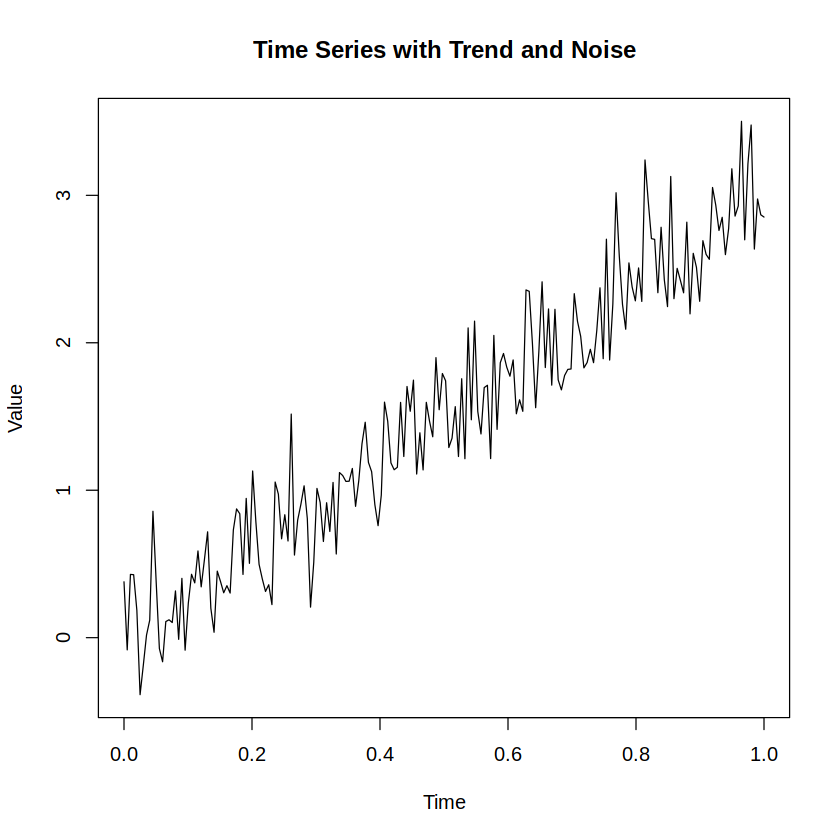

In [11]:
# 필요한 패키지 로드
#install.packages("SiZer")
library(SiZer)

# 시계열 데이터 생성
set.seed(0)
t <- seq(0, 1, length.out = 200)
trend <- 3 * t
noise <- rnorm(length(t), 0, 0.3)
time_series <- trend + noise

# 시계열 데이터 시각화
plot(t, time_series, type = 'l', main = 'Time Series with Trend and Noise', xlab = 'Time', ylab = 'Value')

이 코드는 기본적인 선형 트렌드에 잡음을 추가하여 시계열 데이터를 생성합니다.

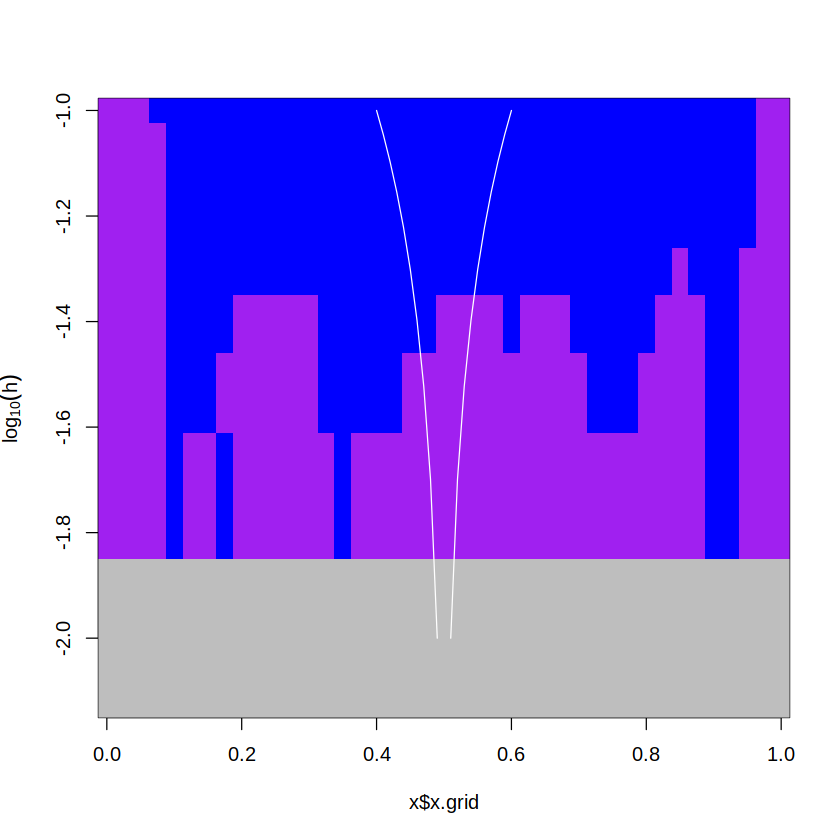

In [12]:
# 다양한 밴드위스 사용
sizer_result <- SiZer(x = t, y = time_series, h = seq(0.01, 0.1, by = 0.01))

# SiZer 결과 시각화
plot(sizer_result)

SiZer 결과 해석

SiZer 플롯에서는 각 밴드위스에 대한 추세의 통계적 유의성을 시각적으로 확인할 수 있습니다: 	y축의 값이 작은 영역은 작은 밴드위스를 사용한 결과를, 큰 값의 영역은 큰 밴드위스를 사용한 결과를 나타냅니다.

	•	파란색 영역: 해당 밴드위스에서 증가 추세가 통계적으로 유의미함을 나타냅니다.
	•	빨간색 영역: 해당 밴드위스에서 감소 추세가 통계적으로 유의미함을 나타냅니다.
	•	보라색 영역: 해당 밴드위스에서 변화가 통계적으로 유의미하지 않음을 나타냅니다.

다양한 밴드위스 사용의 중요성

	•	세부 변화 탐지: 작은 밴드위스를 사용하면 데이터의 세부적인 변화를 감지할 수 있습니다. 이는 데이터의 세밀한 구조를 이해하는 데 유용합니다.
	•	전체 트렌드 이해: 큰 밴드위스를 사용하면 데이터의 전반적인 트렌드를 이해할 수 있습니다. 이는 데이터의 큰 흐름을 파악하는 데 유용합니다.
	•	다중 스케일 분석: 여러 밴드위스를 동시에 사용하면 데이터의 여러 스케일에서 중요한 변화를 탐지할 수 있습니다. 이는 다양한 수준에서 데이터의 특성을 이해하는 데 도움이 됩니다.

종합 정리

SiZer 분석은 다양한 밴드위스를 사용하여 데이터의 중요한 추세를 여러 스케일에서 분석할 수 있는 강력한 도구입니다. 이를 통해 데이터의 전반적인 흐름뿐만 아니라 세부적인 변화까지도 정확히 파악할 수 있습니다. SiZer의 다중 스케일 분석 기능은 데이터 분석에서 매우 유용하며, 특히 복잡한 시계열 데이터에서 중요한 통계적 특징을 식별하는 데 효과적입니다.

# 3. 복잡한 시계열 

In [14]:
# 복잡한 시계열 데이터 생성
set.seed(0)
t <- seq(0, 1, length.out = 200)
trend <- 3 * t + sin(2 * pi * t * 10)
noise <- rnorm(length(t), 0, 0.3)
complex_series <- trend + noise

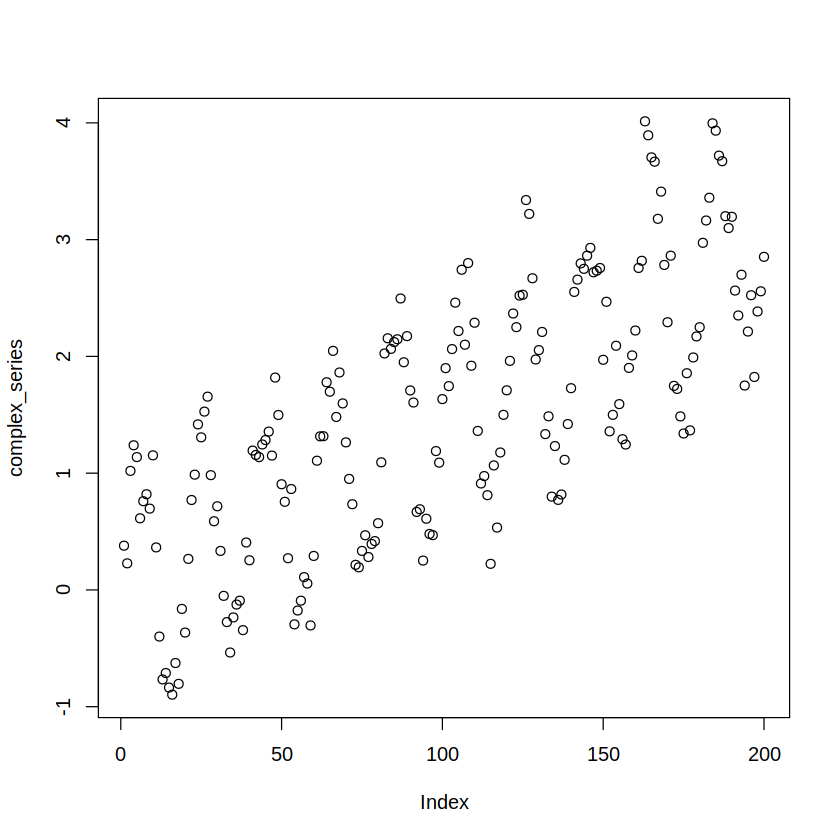

In [16]:
plot(complex_series)

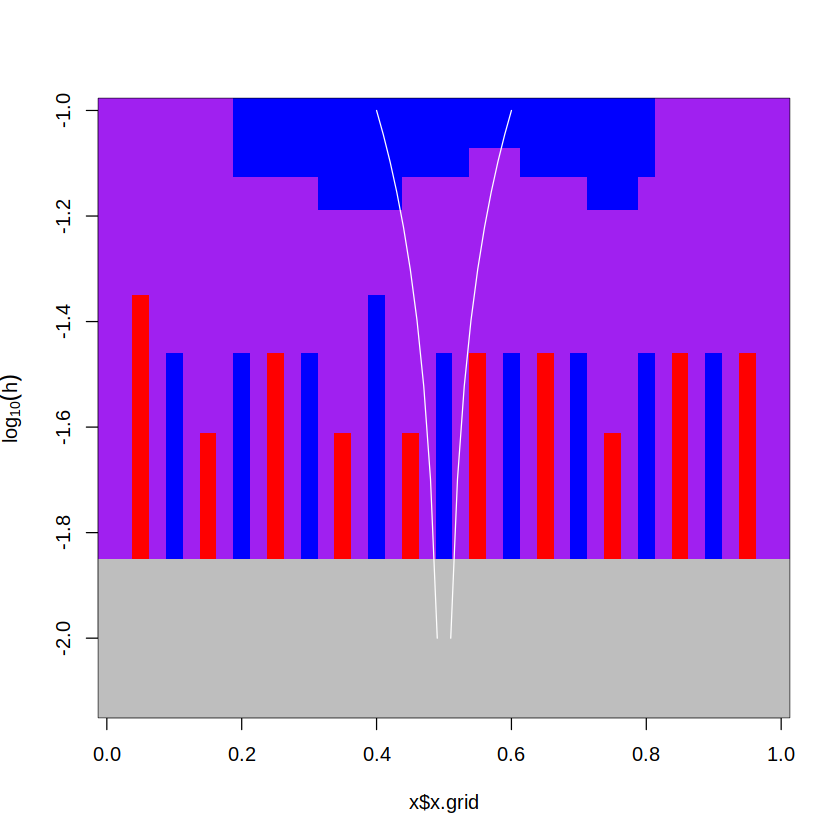

In [17]:
# SiZer 분석
sizer_result <- SiZer(x = t, y = complex_series, h = seq(0.01, 0.1, by = 0.01))

# 결과 시각화
plot(sizer_result)

# 4. Nile

In [19]:
# Nile 데이터셋 사용
data("Nile")

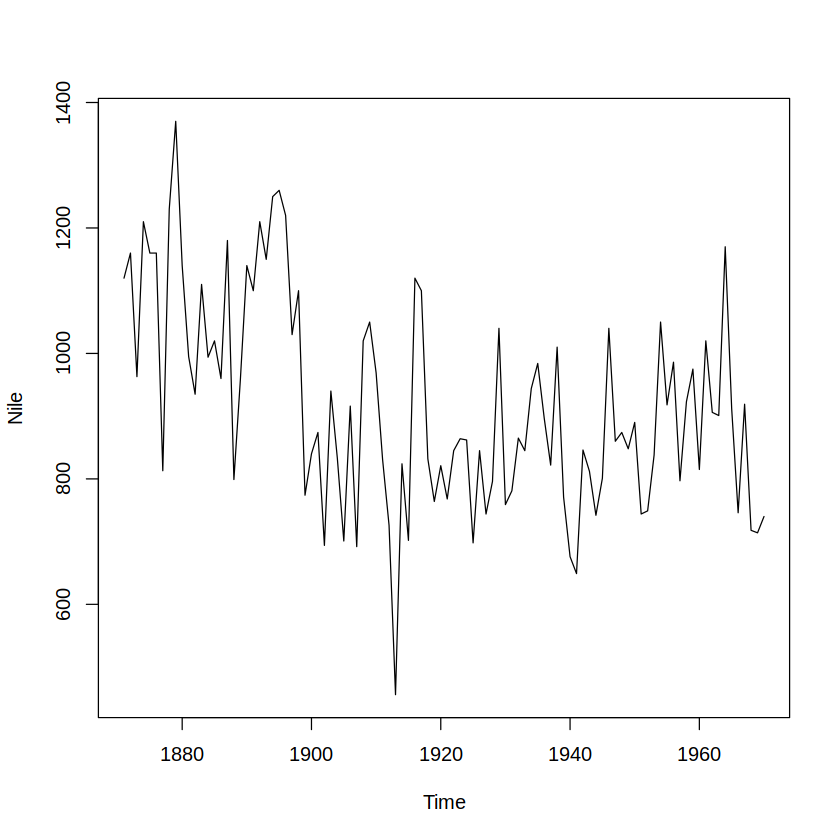

In [20]:
plot(Nile)

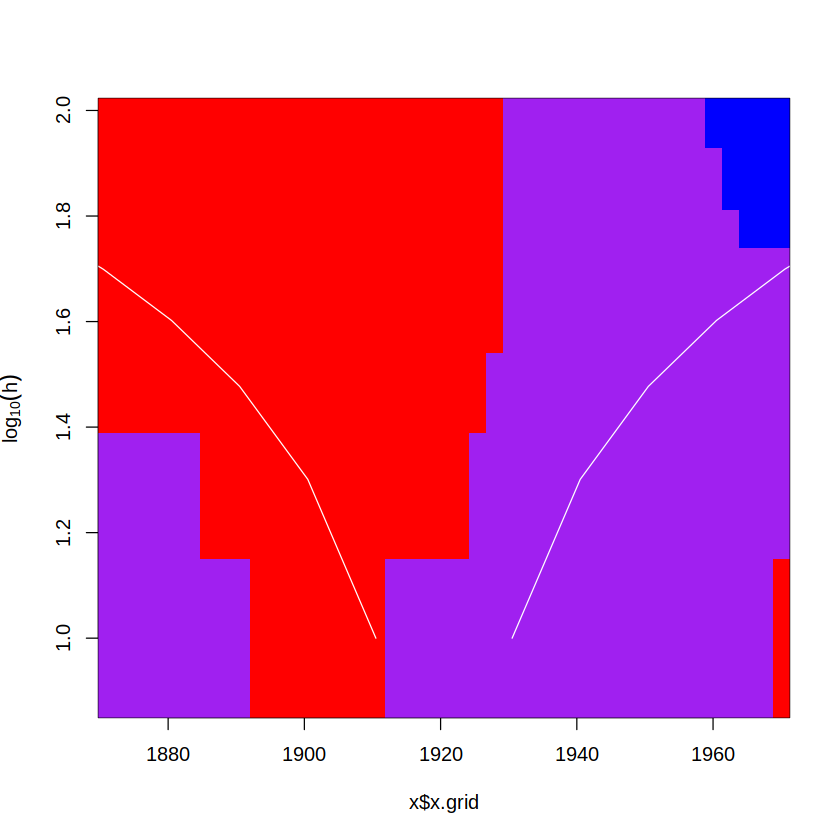

In [21]:
# SiZer 분석
sizer_result <- SiZer(x = time(Nile), y = as.numeric(Nile), h = seq(10, 100, by = 10))

# 결과 시각화
plot(sizer_result)

SiZer 결과 해석

SiZer 결과는 다양한 밴드위스에서의 트렌드를 시각적으로 표현합니다. SiZer 플롯에서 다음을 확인할 수 있습니다:

	•	파란색: 해당 밴드위스에서 증가 추세가 통계적으로 유의미함을 나타냅니다.
	•	빨간색: 해당 밴드위스에서 감소 추세가 통계적으로 유의미함을 나타냅니다.
	•	보라색: 해당 밴드위스에서 변화가 통계적으로 유의미하지 않음을 나타냅니다.

이를 통해 데이터에서 어떤 트렌드가 실제로 존재하는지, 어떤 부분이 잡음에 의한 것인지 시각적으로 쉽게 파악할 수 있습니다.

결론


SiZer 패키지를 사용하면 시간 시계열 데이터의 트렌드를 다양한 밴드위스에서 분석하여 통계적으로 유의미한 변화를 식별할 수 있습니다. 이는 데이터 분석에서 중요한 패턴을 발견하는 데 매우 유용합니다.